## EDA - Exploratory Data Analysis (탐색적 데이터 분석)
분석 초기 단계에서 데이터를 다양한 관점에서 관찰, 이해하는 과정

## 주요 내용
가설 수립
데이터 이해
데이터 품질 검사
데이터 시각화
변수 간 관계 분석
가설 검정
## EDA 전략 프레임워크
문제 정의와 목적 설정
목적) 우리가 해결하려는 비즈니스 문제는 무엇인가
의사결정) 이 분석을 통해 누가, 무엇을 결정하는가
성공기준) 분석의 P/F 기준은 무엇인가
데이터 이해 단계적 접근
데이터 개요 파악
변수 분류와 우선순위 설정
가설 기반 탐색 전략 (xx라면 oo일 것이다)
관찰 - X 변수의 분포는 어떤 특성이 있을것
관계 - X - Y사이의 특정 관계가 있을것
그룹 - A - B 은 특정 변수에서 차이가 있을것
## 데이터 품질의 6가지 차원
완전성 (Completeness): 결측값이 얼마나 적은가? 정확성 (Accuracy): 실제 값과 얼마나 일치하는가? 일관성 (Consistency): 데이터가 모순되지 않는가? 유효성 (Validity): 정의된 규칙에 맞는가? 적시성 (Timeliness): 데이터가 최신인가? 유일성 (Uniqueness): 중복이 없는가?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

In [3]:
%pip install -q scikit-learn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

boston = pd.read_csv('./boston-housing.csv', header=None, sep=r'\s+')
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
display(boston.head())

# 1단계: Boston Housing 데이터 탐색
print("=== Boston Housing 데이터셋 개요 ===")
print(f"데이터 크기: {boston.shape}")
print(f"변수 설명:")

# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

for var, desc in feature_descriptions.items():
    print(f"  {var}: {desc}")

print(f"\n기본 정보:")
print(boston.info())

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


=== Boston Housing 데이터셋 개요 ===
데이터 크기: (506, 14)
변수 설명:
  CRIM: 지역별 1인당 범죄율
  ZN: 25,000 sq.ft. 이상 주거지역 비율
  INDUS: 비소매업 지역 비율
  CHAS: 찰스강 인접 여부 (1: 인접, 0: 비인접)
  NOX: 일산화질소 농도 (ppm)
  RM: 주택당 평균 방 개수
  AGE: 1940년 이전 건축 주택 비율
  DIS: 보스턴 고용센터까지 가중거리
  RAD: 방사형 고속도로 접근성 지수
  TAX: 재산세율
  PTRATIO: 학생-교사 비율
  B: 흑인 거주 비율 관련 지수
  LSTAT: 하위계층 비율
  PRICE: 주택 중간값 (단위: $1000)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-nu

In [4]:
# 2단계: 자동화된 데이터 프로파일링
def comprehensive_data_profile(df, target_col=None):
    """종합적인 데이터 프로파일링 함수"""
    
    print("=" * 60)
    print("📊 종합 데이터 품질 리포트")
    print("=" * 60)
    
    # 1. 기본 통계
    print(f"\n1️⃣ 기본 정보")
    print(f"   데이터 크기: {df.shape[0]:,}행 × {df.shape[1]}열")
    print(f"   메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")
    print(f"   수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개")
    print(f"   범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개")
    
    # 2. 결측값 분석
    print(f"\n2️⃣ 결측값 분석")
    missing_info = df.isnull().sum()
    missing_pct = (missing_info / len(df)) * 100
    
    if missing_info.sum() == 0:
        print("   ✅ 결측값 없음 - 완벽한 완전성!")
    else:
        missing_summary = pd.DataFrame({
            '결측수': missing_info,
            '결측율(%)': missing_pct
        }).round(2)
        missing_summary = missing_summary[missing_summary['결측수'] > 0]
        print(missing_summary)
    
    # 3. 데이터 타입별 분석
    print(f"\n3️⃣ 수치형 변수 품질 분석")
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    
    for col in numeric_cols:
        col_data = df[col].dropna()
        
        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis()
        }
        
        # 이상값 비율 (IQR 방법)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = col_data[(col_data < Q1 - 1.5*IQR) | (col_data > Q3 + 1.5*IQR)]
        stats['이상값_비율(%)'] = (len(outliers) / len(col_data)) * 100
        
        # 유일값 비율
        stats['유일값_비율(%)'] = (col_data.nunique() / len(col_data)) * 100
        
        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report)
    quality_df = quality_df.round(3)
    
    display(quality_df)
    
    # 4. 분포 이상 감지
    print(f"\n4️⃣ 분포 이상 감지")
    print("   극심한 왜도 (|skewness| > 2):")
    high_skew = quality_df[abs(quality_df['왜도']) > 2]['변수명'].tolist()
    if high_skew:
        for var in high_skew:
            skew_val = quality_df[quality_df['변수명']==var]['왜도'].iloc[0]
            print(f"     ⚠️ {var}: 왜도 = {skew_val:.3f}")
    else:
        print("     ✅ 정상 범위 내 분포")
        
    print("   높은 이상값 비율 (>5%):")
    high_outliers = quality_df[quality_df['이상값_비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명']==var]['이상값_비율(%)'].iloc[0]
            print(f"     ⚠️ {var}: 이상값 {outlier_pct:.1f}%")
    else:
        print("     ✅ 이상값 비율 양호")
    
    return quality_df

# Boston 데이터 프로파일링 실행
boston_profile = comprehensive_data_profile(boston, 'PRICE')

📊 종합 데이터 품질 리포트

1️⃣ 기본 정보
   데이터 크기: 506행 × 14열
   메모리 사용량: 0.05 MB
   수치형 변수: 14개
   범주형 변수: 0개

2️⃣ 결측값 분석
   ✅ 결측값 없음 - 완벽한 완전성!

3️⃣ 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값_비율(%),유일값_비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



4️⃣ 분포 이상 감지
   극심한 왜도 (|skewness| > 2):
     ⚠️ CRIM: 왜도 = 5.223
     ⚠️ ZN: 왜도 = 2.226
     ⚠️ CHAS: 왜도 = 3.406
     ⚠️ B: 왜도 = -2.890
   높은 이상값 비율 (>5%):
     ⚠️ CRIM: 이상값 13.0%
     ⚠️ ZN: 이상값 13.4%
     ⚠️ CHAS: 이상값 6.9%
     ⚠️ RM: 이상값 5.9%
     ⚠️ B: 이상값 15.2%
     ⚠️ PRICE: 이상값 7.9%


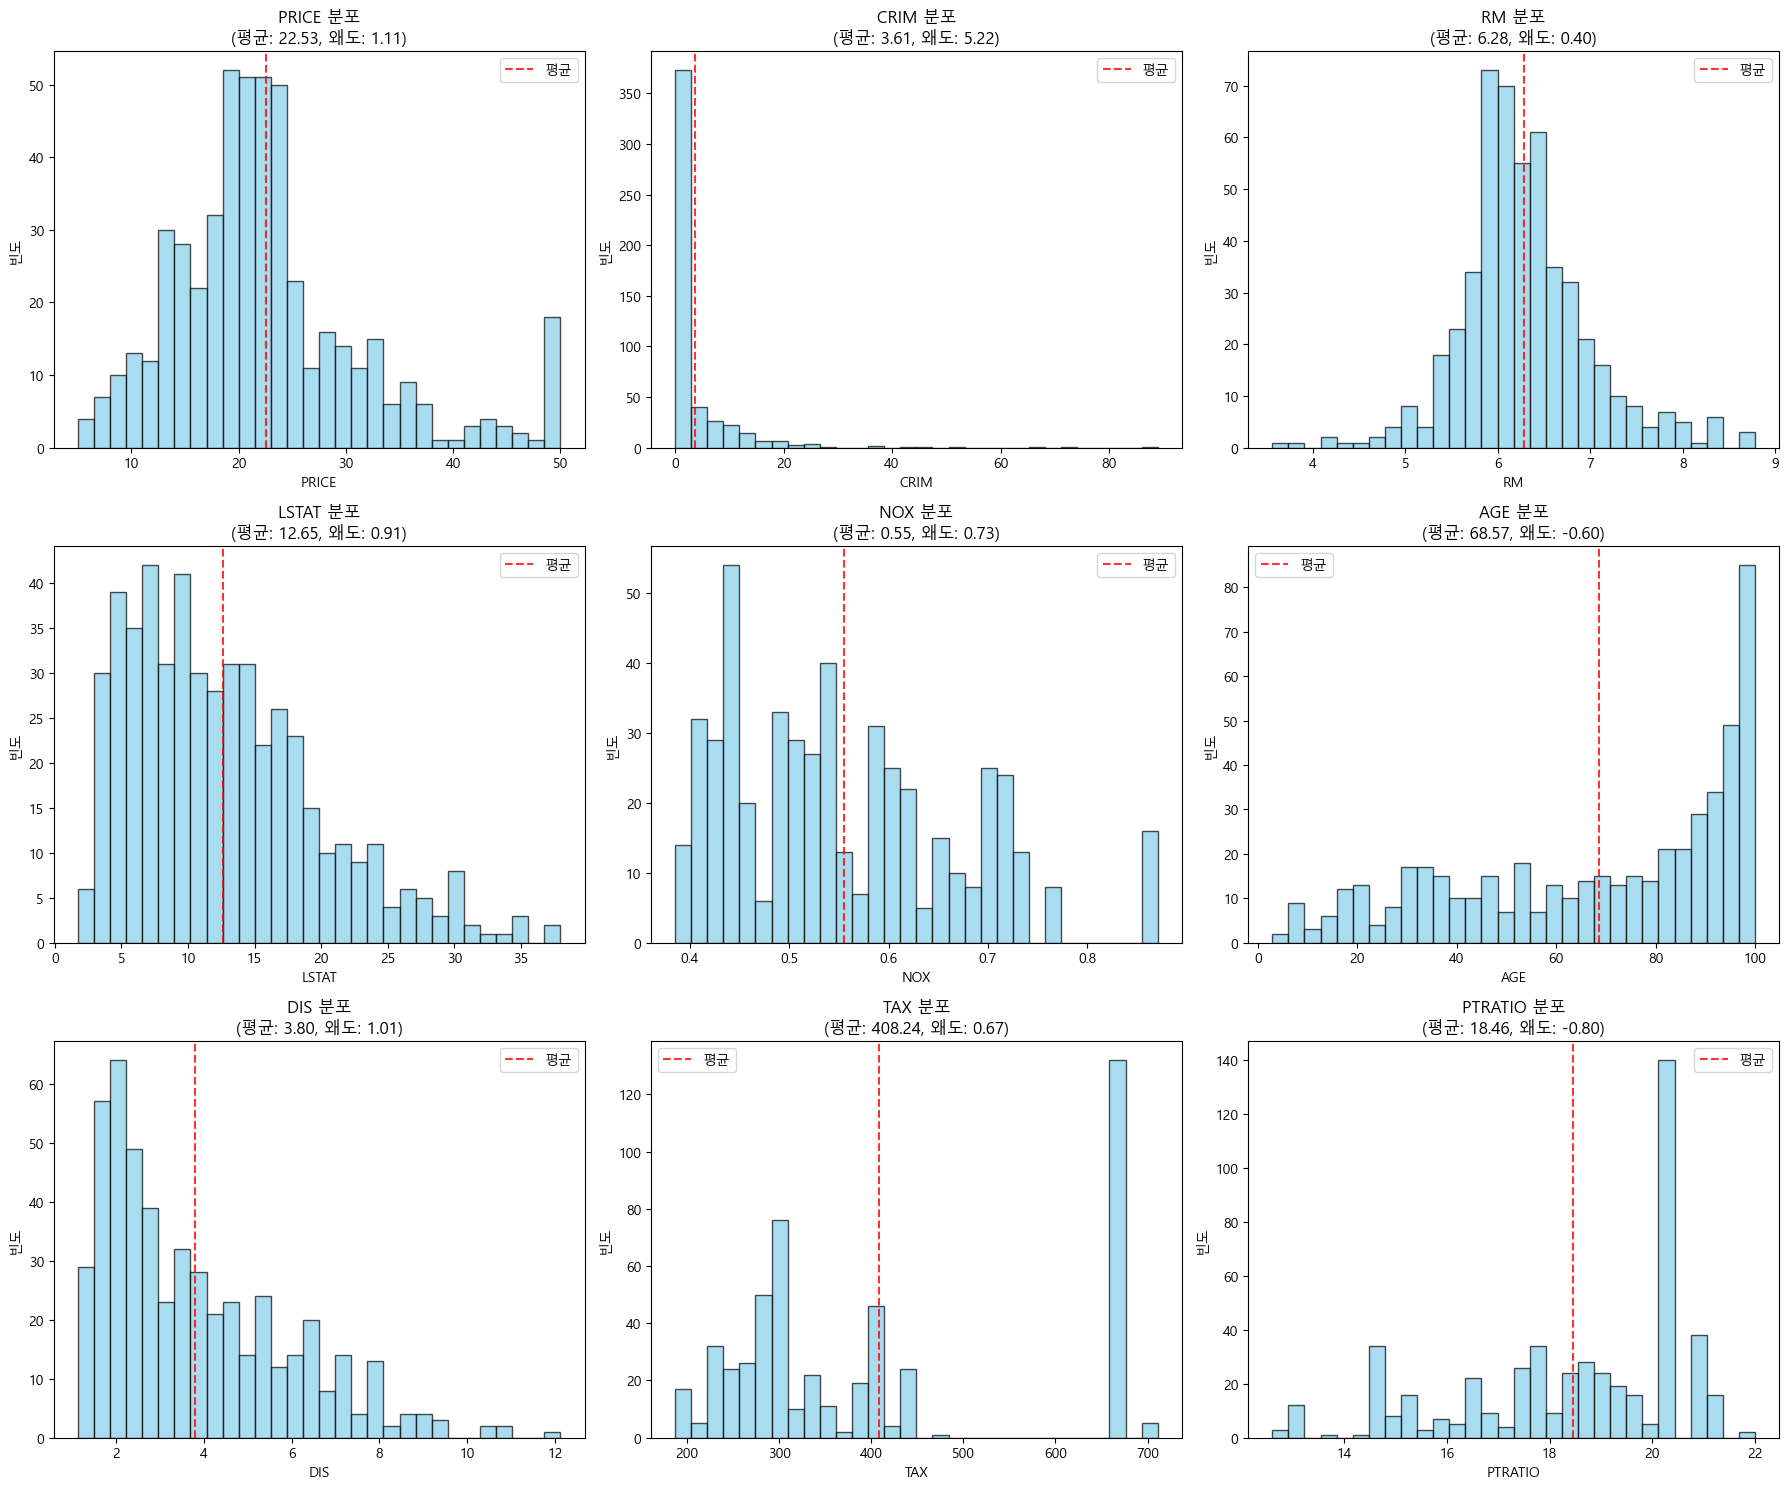

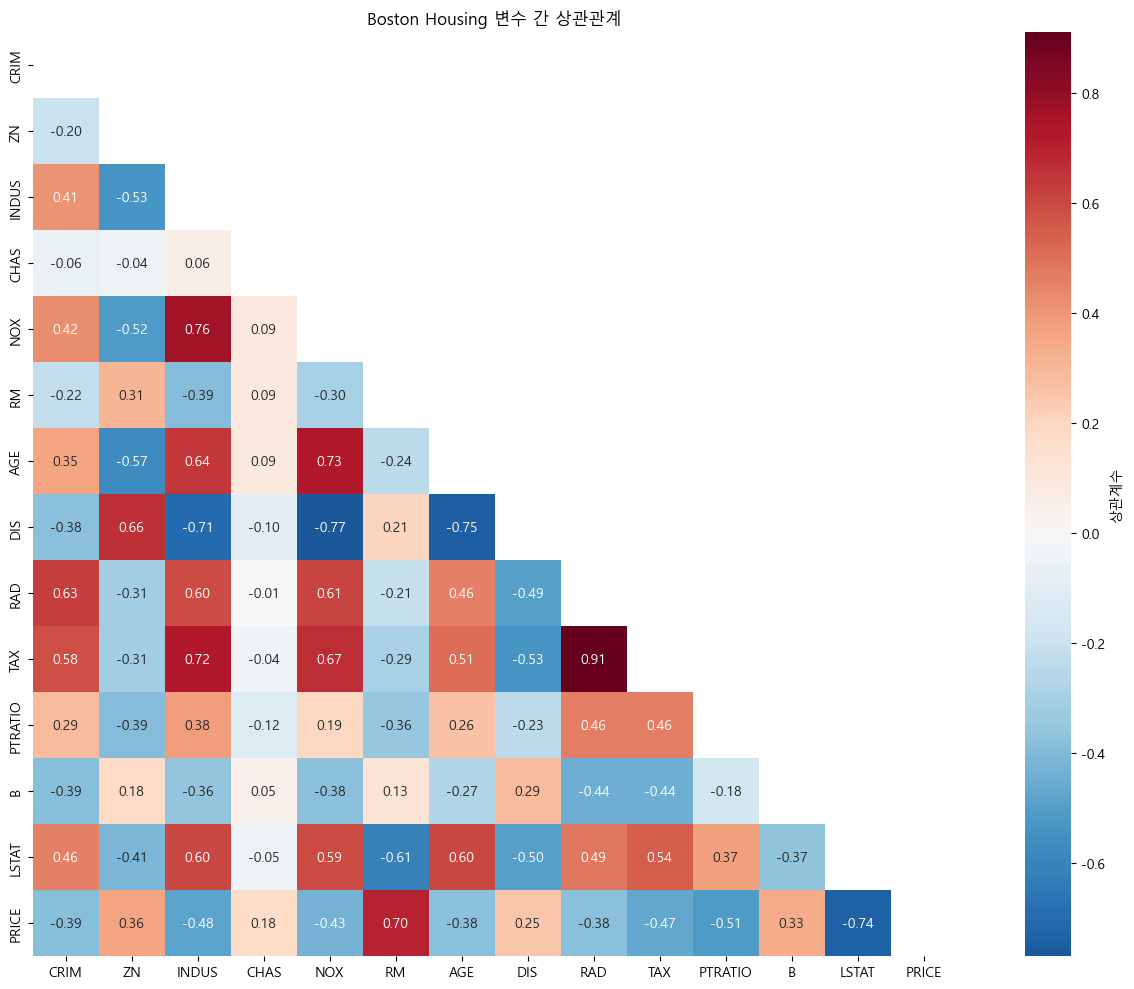

=== 상관관계 분석 결과 ===
PRICE와 상관관계가 높은 변수들:
  LSTAT: 0.738 (음의 상관관계)
  RM: 0.695 (양의 상관관계)
  PTRATIO: 0.508 (음의 상관관계)


In [6]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

# 상관관계 히트맵으로 품질 검증
plt.figure(figsize=(14, 10))
correlation_matrix = boston.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            center=0, cmap='RdBu_r', square=True, cbar_kws={'label': '상관계수'})
plt.title('Boston Housing 변수 간 상관관계')
plt.tight_layout()
plt.show()

print("=== 상관관계 분석 결과 ===")
price_corr = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
print("PRICE와 상관관계가 높은 변수들:")
for var, corr in price_corr.items():
    if var != 'PRICE' and corr > 0.5:
        print(f"  {var}: {corr:.3f} ({'양의 상관관계' if correlation_matrix['PRICE'][var] > 0 else '음의 상관관계'})")

In [7]:
# 4단계: 비즈니스 규칙 기반 검증
def business_rule_validation(df):
    """부동산 도메인 지식 기반 검증"""
    
    print("=== 🏠 부동산 도메인 기반 품질 검증 ===")
    issues = []
    
    # 규칙 1: 방 개수는 1개 이상이어야 함
    low_rooms = df[df['RM'] < 1]
    if len(low_rooms) > 0:
        issues.append(f"⚠️ 방 개수 < 1인 주택: {len(low_rooms)}건")
    else:
        print("✅ 방 개수 정상")
    
    # 규칙 2: 범죄율은 0 이상이어야 함  
    negative_crime = df[df['CRIM'] < 0]
    if len(negative_crime) > 0:
        issues.append(f"⚠️ 음수 범죄율: {len(negative_crime)}건")
    else:
        print("✅ 범죄율 정상")
    
    # 규칙 3: 주택 가격은 양수여야 함
    zero_price = df[df['PRICE'] <= 0]
    if len(zero_price) > 0:
        issues.append(f"⚠️ 0 이하 주택가격: {len(zero_price)}건")
    else:
        print("✅ 주택가격 정상")
        
    # 규칙 4: 비율 변수들은 0-100% 범위 내
    ratio_vars = ['ZN', 'INDUS', 'AGE']
    for var in ratio_vars:
        out_of_range = df[(df[var] < 0) | (df[var] > 100)]
        if len(out_of_range) > 0:
            issues.append(f"⚠️ {var} 비율 범위 초과: {len(out_of_range)}건")
        else:
            print(f"✅ {var} 비율 정상")
    
    # 규칙 5: 찰스강 변수는 0 또는 1만 가능
    invalid_chas = df[~df['CHAS'].isin([0, 1])]
    if len(invalid_chas) > 0:
        issues.append(f"⚠️ CHAS 값 이상: {len(invalid_chas)}건")
    else:
        print("✅ 찰스강 변수 정상")
    
    # 규칙 6: 극단적 이상값 검사 (3-sigma 방법)
    print(f"\n=== 극단값 분석 (3-sigma 기준) ===")
    for col in df.select_dtypes(include=['number']).columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        extreme_outliers = df[abs(df[col] - mean_val) > 3 * std_val]
        
        if len(extreme_outliers) > 0:
            print(f"⚠️ {col}: {len(extreme_outliers)}개 극단값 ({len(extreme_outliers)/len(df)*100:.1f}%)")
        else:
            print(f"✅ {col}: 극단값 없음")
    
    if not issues:
        print(f"\n🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수")
    else:
        print(f"\n📋 발견된 이슈들:")
        for issue in issues:
            print(f"  {issue}")
    
    return issues

# 검증 실행
validation_issues = business_rule_validation(boston)

=== 🏠 부동산 도메인 기반 품질 검증 ===
✅ 방 개수 정상
✅ 범죄율 정상
✅ 주택가격 정상
✅ ZN 비율 정상
✅ INDUS 비율 정상
✅ AGE 비율 정상
✅ 찰스강 변수 정상

=== 극단값 분석 (3-sigma 기준) ===
⚠️ CRIM: 8개 극단값 (1.6%)
⚠️ ZN: 14개 극단값 (2.8%)
✅ INDUS: 극단값 없음
⚠️ CHAS: 35개 극단값 (6.9%)
✅ NOX: 극단값 없음
⚠️ RM: 8개 극단값 (1.6%)
✅ AGE: 극단값 없음
⚠️ DIS: 5개 극단값 (1.0%)
✅ RAD: 극단값 없음
✅ TAX: 극단값 없음
✅ PTRATIO: 극단값 없음
⚠️ B: 25개 극단값 (4.9%)
⚠️ LSTAT: 5개 극단값 (1.0%)
✅ PRICE: 극단값 없음

🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수


In [8]:
# 5단계: 변수 간 논리적 일관성 검증
print("\n=== 🔍 변수 간 논리적 관계 검증 ===")

# 관계 1: 범죄율과 주택가격 (일반적으로 음의 상관관계 예상)
crime_price_corr = boston['CRIM'].corr(boston['PRICE'])
print(f"범죄율-주택가격 상관계수: {crime_price_corr:.3f}")
if crime_price_corr < -0.3:
    print("✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당")
elif crime_price_corr < 0:
    print("⚠️ 약한 음의 상관관계 - 다른 요인들이 영향")
else:
    print("❌ 양의 상관관계 - 논리적으로 의외, 추가 조사 필요")

# 관계 2: 방 개수와 주택가격 (양의 상관관계 예상)
rooms_price_corr = boston['RM'].corr(boston['PRICE'])
print(f"방개수-주택가격 상관계수: {rooms_price_corr:.3f}")
if rooms_price_corr > 0.5:
    print("✅ 강한 양의 상관관계 - 논리적으로 타당")
else:
    print("⚠️ 예상보다 약한 관계")

# 관계 3: 하위계층 비율과 주택가격 (음의 상관관계 예상)
lstat_price_corr = boston['LSTAT'].corr(boston['PRICE'])
print(f"하위계층비율-주택가격 상관계수: {lstat_price_corr:.3f}")

# 이상 패턴 탐지: 높은 가격인데 높은 범죄율
high_price_high_crime = boston[(boston['PRICE'] > boston['PRICE'].quantile(0.8)) & 
                              (boston['CRIM'] > boston['CRIM'].quantile(0.8))]
print(f"\n🚨 이상 패턴 감지:")
print(f"높은 가격 & 높은 범죄율 지역: {len(high_price_high_crime)}곳")
if len(high_price_high_crime) > 0:
    print("해당 지역들의 특성 분석 필요")

# 품질 점수 종합
def calculate_overall_quality_score(df, issues_count=0):
    """전체 데이터 품질 점수 계산"""
    
    scores = {}
    
    # 완전성 점수 (결측값 기준)
    completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    scores['완전성'] = completeness
    
    # 일관성 점수 (비즈니스 규칙 위반 기준) 
    consistency = max(0, (1 - issues_count / len(df)) * 100)
    scores['일관성'] = consistency
    
    # 유효성 점수 (극단값 비율 기준)
    validity_issues = 0
    for col in df.select_dtypes(include=['number']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
        validity_issues += len(outliers)
    
    validity = max(0, (1 - validity_issues / len(df)) * 100)
    scores['유효성'] = validity
    
    # 전체 점수
    overall_score = np.mean(list(scores.values()))
    scores['종합점수'] = overall_score
    
    return scores

quality_scores = calculate_overall_quality_score(boston, len(validation_issues))

print(f"\n=== 📊 최종 품질 평가 ===")
for dimension, score in quality_scores.items():
    if score >= 90:
        status = "🟢 우수"
    elif score >= 70:
        status = "🟡 양호" 
    else:
        status = "🔴 개선필요"
    print(f"{dimension}: {score:.1f}점 {status}")


=== 🔍 변수 간 논리적 관계 검증 ===
범죄율-주택가격 상관계수: -0.388
✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당
방개수-주택가격 상관계수: 0.695
✅ 강한 양의 상관관계 - 논리적으로 타당
하위계층비율-주택가격 상관계수: -0.738

🚨 이상 패턴 감지:
높은 가격 & 높은 범죄율 지역: 4곳
해당 지역들의 특성 분석 필요

=== 📊 최종 품질 평가 ===
완전성: 100.0점 🟢 우수
일관성: 100.0점 🟢 우수
유효성: 63.4점 🔴 개선필요
종합점수: 87.8점 🟡 양호


In [9]:
def get_data_profile(df: pd.DataFrame, target_col=None):
    """종합적인 데이터 프로파일링 함수"""

    print('=' * 50)
    print('종합 데이터 폼질 리포트')
    print('=' * 50)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('결측값 없음. 완전')
    else:
        missing_sum = pd.DataFrame({
            '결측수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3.데이터 타입별 분석
    print(f'\n수치형 변수 품질 분석')
    num_cols = df.select_dtypes(incllude=['number']).columns

    quality_report=[]
    for col in num_cols:
        col_data=df[col].dropna()
        #기본 통계
        stats = {
            '변수명': col
            '평균'
        }

get_data_profile(boston)

종합 데이터 폼질 리포트

1. 기본정보
- 데이터 크기: 506행 x 14열
- 메모리 사용량: 0.05mb
- 수치형 변수: 14개
- 범주형 변수: 0개

2. 결측값 분석
결측값 없음. 완전


In [10]:
def get_data_profile(df: pd.DataFrame, target_col=None):
    """종합적인 데이터 프로파일링 함수"""

    print('=' * 50)
    print('종합 데이터 폼질 리포트')
    print('=' * 50)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('✅ 결측값 없음. 완전')
    else:
        print('⚠️')
        missing_sum = pd.DataFrame({
            '결축수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3. 데이터 타입별 분석
    print(f'\n3. 수치형 변수 품질 분석')
    num_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis(),
        }

        # 이상값 비율 (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 + 1.5 * IQR)
        outliers = col_data[mask]
        stats['이상값비율(%)'] = (len(outliers) / len(col_data)) * 100

        # 유일값 비율
        stats['유일값비율(%)'] = (col_data.nunique() / len(col_data)) * 100

        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report).round(3)
    display(quality_df)

    # 4. 분포 이상 감지
    print(f'\n4. 분포 이상 감지')
    print(f'\n- 극심한 왜도 (|skewness|>2)')
    high_skews = quality_df[abs(quality_df['왜도']) > 2]['변수명'].to_list()
    
    if high_skews:  # high_skews 리스트가 값이 있으면,
        print('⚠️')
        for var in high_skews:
            skew_val = quality_df[quality_df['변수명'] == var].iloc[0]['왜도']
            print(f'-- {var}: 왜도 = {skew_val:.3f}')
    else:
        print('-- ✅ 정상 범위 내 분포')

    print('\n- 높은 이상값 비율(>5%)')
    high_outliers = quality_df[quality_df['이상값비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        print('⚠️')
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명'] == var].iloc[0]['이상값비율(%)']
            print(f'-- {var}: 이상값 {outlier_pct:.1f}%')
    else:
        print('-- ✅ 이상값 비율 양호')

    return quality_df


get_data_profile(boston)

종합 데이터 폼질 리포트

1. 기본정보
- 데이터 크기: 506행 x 14열
- 메모리 사용량: 0.05mb
- 수치형 변수: 14개
- 범주형 변수: 0개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- CRIM: 왜도 = 5.223
-- ZN: 왜도 = 2.226
-- CHAS: 왜도 = 3.406
-- B: 왜도 = -2.890

- 높은 이상값 비율(>5%)
⚠️
-- CRIM: 이상값 13.0%
-- ZN: 이상값 13.4%
-- CHAS: 이상값 6.9%
-- RM: 이상값 5.9%
-- B: 이상값 15.2%
-- PRICE: 이상값 7.9%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043


In [11]:
%pip install -q scikit-learn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

boston = pd.read_csv('./boston-housing.csv', header=None, sep=r'\s+')
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
display(boston.head())

# 1단계: Boston Housing 데이터 탐색
print("=== Boston Housing 데이터셋 개요 ===")
print(f"데이터 크기: {boston.shape}")
print(f"변수 설명:")

# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

for var, desc in feature_descriptions.items():
    print(f"  {var}: {desc}")

print(f"\n기본 정보:")
print(boston.info())

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


=== Boston Housing 데이터셋 개요 ===
데이터 크기: (506, 14)
변수 설명:
  CRIM: 지역별 1인당 범죄율
  ZN: 25,000 sq.ft. 이상 주거지역 비율
  INDUS: 비소매업 지역 비율
  CHAS: 찰스강 인접 여부 (1: 인접, 0: 비인접)
  NOX: 일산화질소 농도 (ppm)
  RM: 주택당 평균 방 개수
  AGE: 1940년 이전 건축 주택 비율
  DIS: 보스턴 고용센터까지 가중거리
  RAD: 방사형 고속도로 접근성 지수
  TAX: 재산세율
  PTRATIO: 학생-교사 비율
  B: 흑인 거주 비율 관련 지수
  LSTAT: 하위계층 비율
  PRICE: 주택 중간값 (단위: $1000)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-nu

In [12]:
# 2단계: 자동화된 데이터 프로파일링
def comprehensive_data_profile(df, target_col=None):
    """종합적인 데이터 프로파일링 함수"""
    
    print("=" * 60)
    print("📊 종합 데이터 품질 리포트")
    print("=" * 60)
    
    # 1. 기본 통계
    print(f"\n1️⃣ 기본 정보")
    print(f"   데이터 크기: {df.shape[0]:,}행 × {df.shape[1]}열")
    print(f"   메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")
    print(f"   수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개")
    print(f"   범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개")
    
    # 2. 결측값 분석
    print(f"\n2️⃣ 결측값 분석")
    missing_info = df.isnull().sum()
    missing_pct = (missing_info / len(df)) * 100
    
    if missing_info.sum() == 0:
        print("   ✅ 결측값 없음 - 완벽한 완전성!")
    else:
        missing_summary = pd.DataFrame({
            '결측수': missing_info,
            '결측율(%)': missing_pct
        }).round(2)
        missing_summary = missing_summary[missing_summary['결측수'] > 0]
        print(missing_summary)
    
    # 3. 데이터 타입별 분석
    print(f"\n3️⃣ 수치형 변수 품질 분석")
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    
    for col in numeric_cols:
        col_data = df[col].dropna()
        
        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis()
        }
        
        # 이상값 비율 (IQR 방법)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = col_data[(col_data < Q1 - 1.5*IQR) | (col_data > Q3 + 1.5*IQR)]
        stats['이상값_비율(%)'] = (len(outliers) / len(col_data)) * 100
        
        # 유일값 비율
        stats['유일값_비율(%)'] = (col_data.nunique() / len(col_data)) * 100
        
        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report)
    quality_df = quality_df.round(3)
    
    display(quality_df)
    
    # 4. 분포 이상 감지
    print(f"\n4️⃣ 분포 이상 감지")
    print("   극심한 왜도 (|skewness| > 2):")
    high_skew = quality_df[abs(quality_df['왜도']) > 2]['변수명'].tolist()
    if high_skew:
        for var in high_skew:
            skew_val = quality_df[quality_df['변수명']==var]['왜도'].iloc[0]
            print(f"     ⚠️ {var}: 왜도 = {skew_val:.3f}")
    else:
        print("     ✅ 정상 범위 내 분포")
        
    print("   높은 이상값 비율 (>5%):")
    high_outliers = quality_df[quality_df['이상값_비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명']==var]['이상값_비율(%)'].iloc[0]
            print(f"     ⚠️ {var}: 이상값 {outlier_pct:.1f}%")
    else:
        print("     ✅ 이상값 비율 양호")
    
    return quality_df

# Boston 데이터 프로파일링 실행
boston_profile = comprehensive_data_profile(boston, 'PRICE')

📊 종합 데이터 품질 리포트

1️⃣ 기본 정보
   데이터 크기: 506행 × 14열
   메모리 사용량: 0.05 MB
   수치형 변수: 14개
   범주형 변수: 0개

2️⃣ 결측값 분석
   ✅ 결측값 없음 - 완벽한 완전성!

3️⃣ 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값_비율(%),유일값_비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



4️⃣ 분포 이상 감지
   극심한 왜도 (|skewness| > 2):
     ⚠️ CRIM: 왜도 = 5.223
     ⚠️ ZN: 왜도 = 2.226
     ⚠️ CHAS: 왜도 = 3.406
     ⚠️ B: 왜도 = -2.890
   높은 이상값 비율 (>5%):
     ⚠️ CRIM: 이상값 13.0%
     ⚠️ ZN: 이상값 13.4%
     ⚠️ CHAS: 이상값 6.9%
     ⚠️ RM: 이상값 5.9%
     ⚠️ B: 이상값 15.2%
     ⚠️ PRICE: 이상값 7.9%


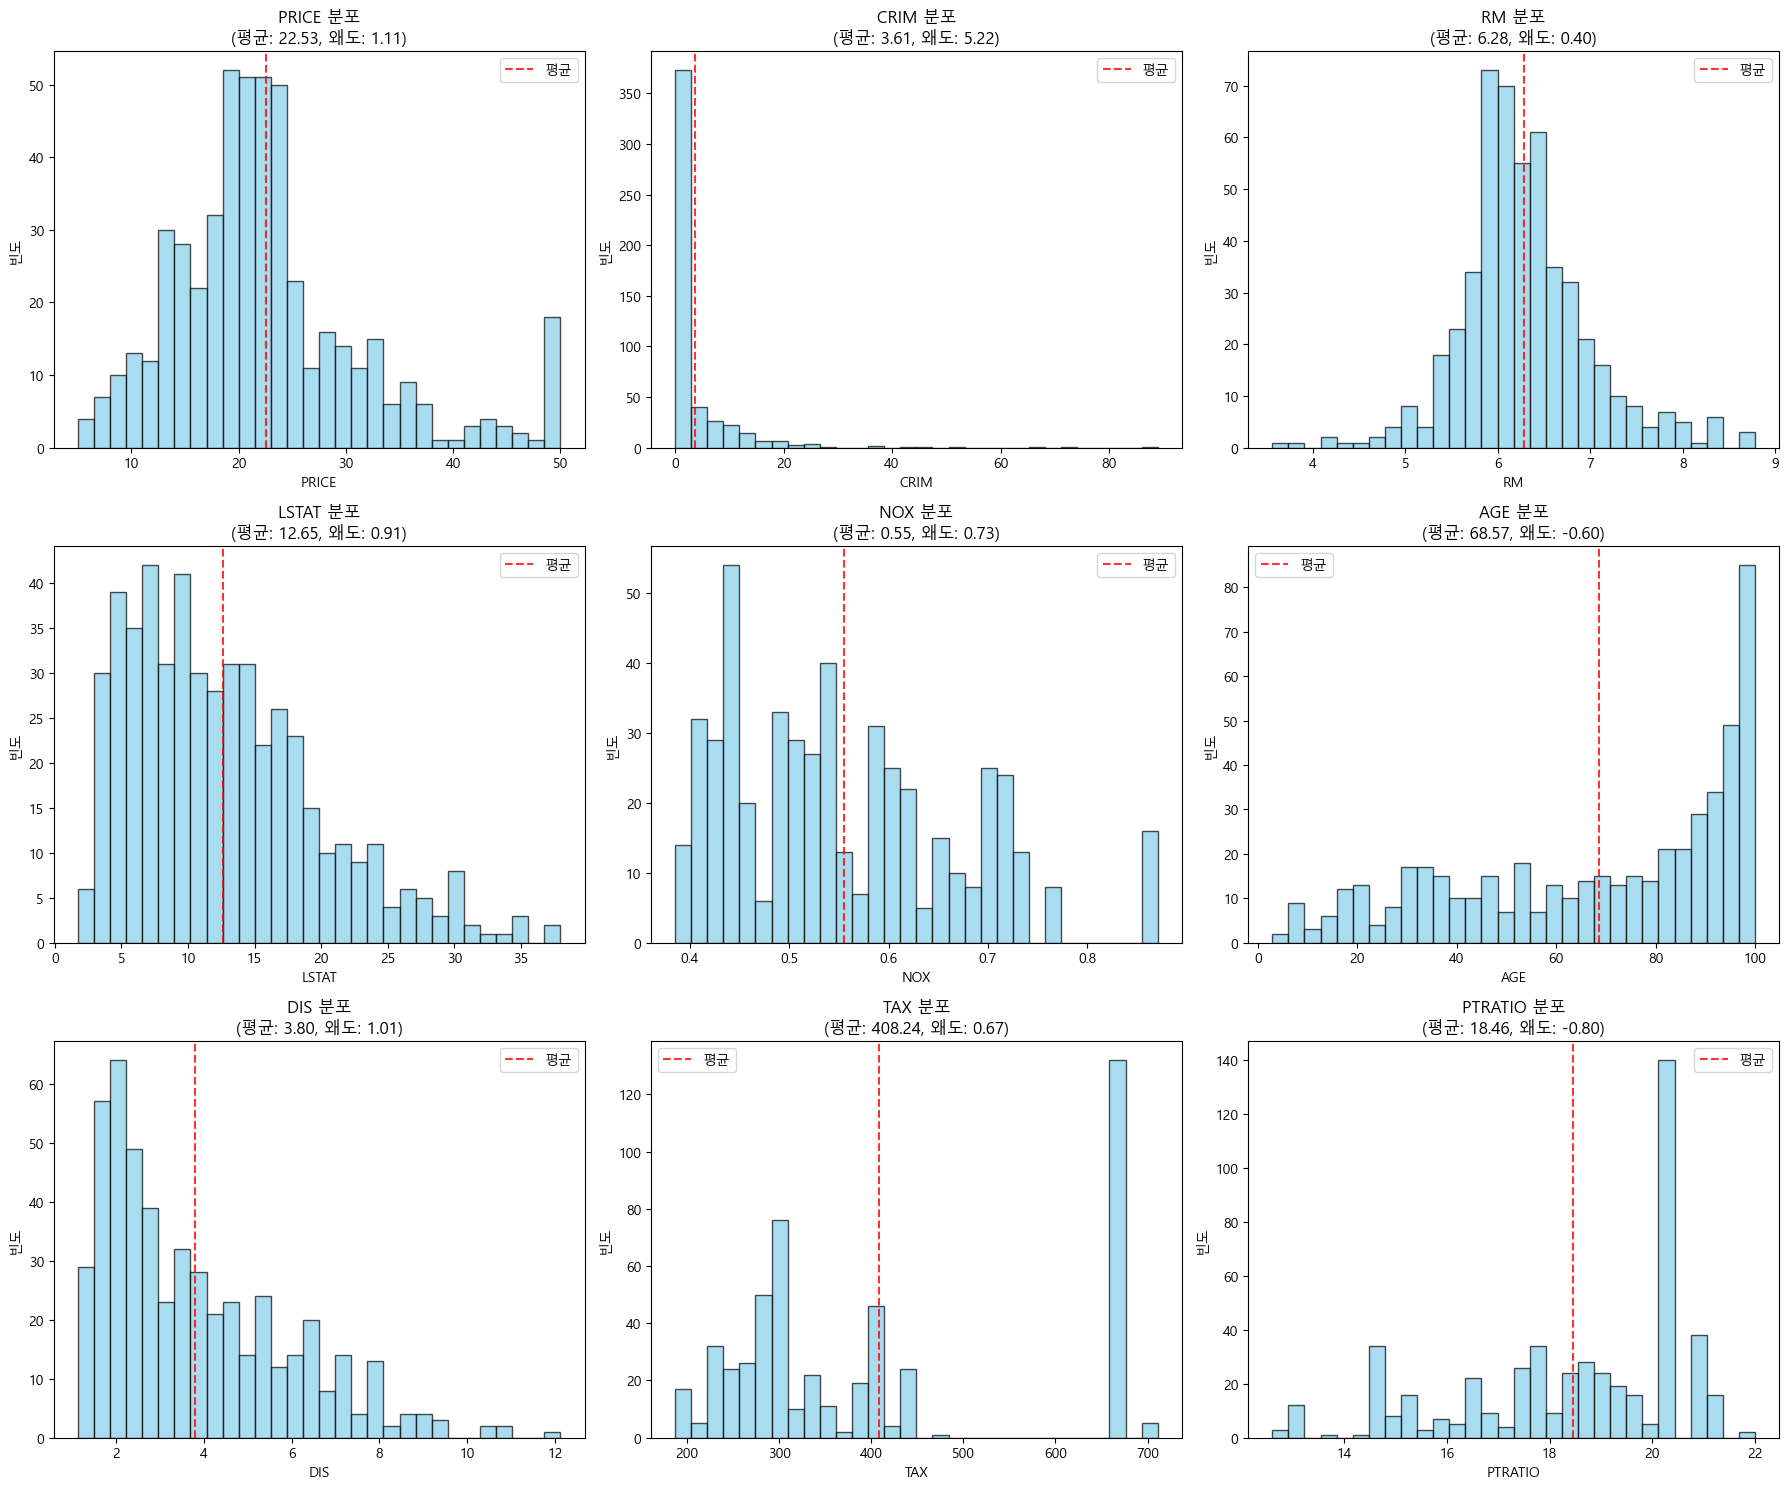

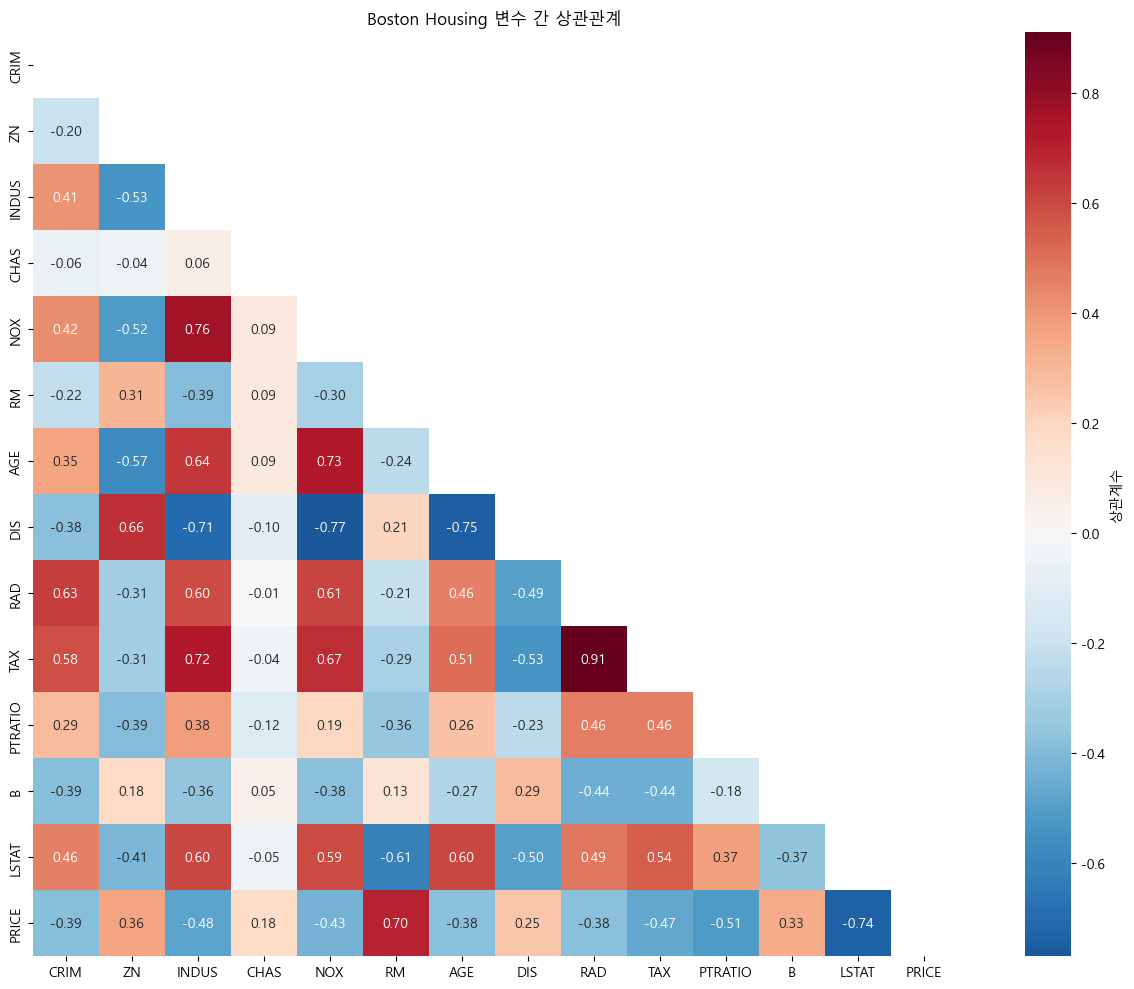

=== 상관관계 분석 결과 ===
PRICE와 상관관계가 높은 변수들:
  LSTAT: 0.738 (음의 상관관계)
  RM: 0.695 (양의 상관관계)
  PTRATIO: 0.508 (음의 상관관계)


In [13]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

# 상관관계 히트맵으로 품질 검증
plt.figure(figsize=(14, 10))
correlation_matrix = boston.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            center=0, cmap='RdBu_r', square=True, cbar_kws={'label': '상관계수'})
plt.title('Boston Housing 변수 간 상관관계')
plt.tight_layout()
plt.show()

print("=== 상관관계 분석 결과 ===")
price_corr = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
print("PRICE와 상관관계가 높은 변수들:")
for var, corr in price_corr.items():
    if var != 'PRICE' and corr > 0.5:
        print(f"  {var}: {corr:.3f} ({'양의 상관관계' if correlation_matrix['PRICE'][var] > 0 else '음의 상관관계'})")

In [14]:
# 4단계: 비즈니스 규칙 기반 검증
def business_rule_validation(df):
    """부동산 도메인 지식 기반 검증"""
    
    print("=== 🏠 부동산 도메인 기반 품질 검증 ===")
    issues = []
    
    # 규칙 1: 방 개수는 1개 이상이어야 함
    low_rooms = df[df['RM'] < 1]
    if len(low_rooms) > 0:
        issues.append(f"⚠️ 방 개수 < 1인 주택: {len(low_rooms)}건")
    else:
        print("✅ 방 개수 정상")
    
    # 규칙 2: 범죄율은 0 이상이어야 함  
    negative_crime = df[df['CRIM'] < 0]
    if len(negative_crime) > 0:
        issues.append(f"⚠️ 음수 범죄율: {len(negative_crime)}건")
    else:
        print("✅ 범죄율 정상")
    
    # 규칙 3: 주택 가격은 양수여야 함
    zero_price = df[df['PRICE'] <= 0]
    if len(zero_price) > 0:
        issues.append(f"⚠️ 0 이하 주택가격: {len(zero_price)}건")
    else:
        print("✅ 주택가격 정상")
        
    # 규칙 4: 비율 변수들은 0-100% 범위 내
    ratio_vars = ['ZN', 'INDUS', 'AGE']
    for var in ratio_vars:
        out_of_range = df[(df[var] < 0) | (df[var] > 100)]
        if len(out_of_range) > 0:
            issues.append(f"⚠️ {var} 비율 범위 초과: {len(out_of_range)}건")
        else:
            print(f"✅ {var} 비율 정상")
    
    # 규칙 5: 찰스강 변수는 0 또는 1만 가능
    invalid_chas = df[~df['CHAS'].isin([0, 1])]
    if len(invalid_chas) > 0:
        issues.append(f"⚠️ CHAS 값 이상: {len(invalid_chas)}건")
    else:
        print("✅ 찰스강 변수 정상")
    
    # 규칙 6: 극단적 이상값 검사 (3-sigma 방법)
    print(f"\n=== 극단값 분석 (3-sigma 기준) ===")
    for col in df.select_dtypes(include=['number']).columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        extreme_outliers = df[abs(df[col] - mean_val) > 3 * std_val]
        
        if len(extreme_outliers) > 0:
            print(f"⚠️ {col}: {len(extreme_outliers)}개 극단값 ({len(extreme_outliers)/len(df)*100:.1f}%)")
        else:
            print(f"✅ {col}: 극단값 없음")
    
    if not issues:
        print(f"\n🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수")
    else:
        print(f"\n📋 발견된 이슈들:")
        for issue in issues:
            print(f"  {issue}")
    
    return issues

# 검증 실행
validation_issues = business_rule_validation(boston)

=== 🏠 부동산 도메인 기반 품질 검증 ===
✅ 방 개수 정상
✅ 범죄율 정상
✅ 주택가격 정상
✅ ZN 비율 정상
✅ INDUS 비율 정상
✅ AGE 비율 정상
✅ 찰스강 변수 정상

=== 극단값 분석 (3-sigma 기준) ===
⚠️ CRIM: 8개 극단값 (1.6%)
⚠️ ZN: 14개 극단값 (2.8%)
✅ INDUS: 극단값 없음
⚠️ CHAS: 35개 극단값 (6.9%)
✅ NOX: 극단값 없음
⚠️ RM: 8개 극단값 (1.6%)
✅ AGE: 극단값 없음
⚠️ DIS: 5개 극단값 (1.0%)
✅ RAD: 극단값 없음
✅ TAX: 극단값 없음
✅ PTRATIO: 극단값 없음
⚠️ B: 25개 극단값 (4.9%)
⚠️ LSTAT: 5개 극단값 (1.0%)
✅ PRICE: 극단값 없음

🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수


In [15]:
# 5단계: 변수 간 논리적 일관성 검증
print("\n=== 🔍 변수 간 논리적 관계 검증 ===")

# 관계 1: 범죄율과 주택가격 (일반적으로 음의 상관관계 예상)
crime_price_corr = boston['CRIM'].corr(boston['PRICE'])
print(f"범죄율-주택가격 상관계수: {crime_price_corr:.3f}")
if crime_price_corr < -0.3:
    print("✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당")
elif crime_price_corr < 0:
    print("⚠️ 약한 음의 상관관계 - 다른 요인들이 영향")
else:
    print("❌ 양의 상관관계 - 논리적으로 의외, 추가 조사 필요")

# 관계 2: 방 개수와 주택가격 (양의 상관관계 예상)
rooms_price_corr = boston['RM'].corr(boston['PRICE'])
print(f"방개수-주택가격 상관계수: {rooms_price_corr:.3f}")
if rooms_price_corr > 0.5:
    print("✅ 강한 양의 상관관계 - 논리적으로 타당")
else:
    print("⚠️ 예상보다 약한 관계")

# 관계 3: 하위계층 비율과 주택가격 (음의 상관관계 예상)
lstat_price_corr = boston['LSTAT'].corr(boston['PRICE'])
print(f"하위계층비율-주택가격 상관계수: {lstat_price_corr:.3f}")

# 이상 패턴 탐지: 높은 가격인데 높은 범죄율
high_price_high_crime = boston[(boston['PRICE'] > boston['PRICE'].quantile(0.8)) & 
                              (boston['CRIM'] > boston['CRIM'].quantile(0.8))]
print(f"\n🚨 이상 패턴 감지:")
print(f"높은 가격 & 높은 범죄율 지역: {len(high_price_high_crime)}곳")
if len(high_price_high_crime) > 0:
    print("해당 지역들의 특성 분석 필요")

# 품질 점수 종합
def calculate_overall_quality_score(df, issues_count=0):
    """전체 데이터 품질 점수 계산"""
    
    scores = {}
    
    # 완전성 점수 (결측값 기준)
    completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    scores['완전성'] = completeness
    
    # 일관성 점수 (비즈니스 규칙 위반 기준) 
    consistency = max(0, (1 - issues_count / len(df)) * 100)
    scores['일관성'] = consistency
    
    # 유효성 점수 (극단값 비율 기준)
    validity_issues = 0
    for col in df.select_dtypes(include=['number']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
        validity_issues += len(outliers)
    
    validity = max(0, (1 - validity_issues / len(df)) * 100)
    scores['유효성'] = validity
    
    # 전체 점수
    overall_score = np.mean(list(scores.values()))
    scores['종합점수'] = overall_score
    
    return scores

quality_scores = calculate_overall_quality_score(boston, len(validation_issues))

print(f"\n=== 📊 최종 품질 평가 ===")
for dimension, score in quality_scores.items():
    if score >= 90:
        status = "🟢 우수"
    elif score >= 70:
        status = "🟡 양호" 
    else:
        status = "🔴 개선필요"
    print(f"{dimension}: {score:.1f}점 {status}")


=== 🔍 변수 간 논리적 관계 검증 ===
범죄율-주택가격 상관계수: -0.388
✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당
방개수-주택가격 상관계수: 0.695
✅ 강한 양의 상관관계 - 논리적으로 타당
하위계층비율-주택가격 상관계수: -0.738

🚨 이상 패턴 감지:
높은 가격 & 높은 범죄율 지역: 4곳
해당 지역들의 특성 분석 필요

=== 📊 최종 품질 평가 ===
완전성: 100.0점 🟢 우수
일관성: 100.0점 🟢 우수
유효성: 63.4점 🔴 개선필요
종합점수: 87.8점 🟡 양호


=== 온라인 소매 데이터 개요 ===
데이터 크기: (1000, 14)

데이터 샘플:


,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
5,6,32.0,F,Busan,7,75.49,53,3.2,151.0,48.28,4.30,31.78,0.00,10.51
6,7,53.0,M,Busan,10,92.04,9,5.0,123.0,0.00,19.93,6.88,109.88,0.00
7,8,44.0,F,Seoul,10,95.80,23,1.0,135.0,37.61,23.63,24.12,13.02,0.00
8,9,29.0,F,Gwangju,10,156.80,2,5.0,76.0,24.55,18.20,20.30,3.03,13.65
9,10,41.0,F,Seoul,4,157.57,74,3.7,77.0,0.00,31.13,0.00,0.00,0.00



기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int32  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float64
dtypes

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# 온라인 소매 데이터 생성 (컬럼명 소문자 버전)
np.random.seed(42)
n_customers = 1000

def create_realistic_ecommerce_data(n=1000):
    """실제와 유사한 전자상거래 데이터 생성 (소문자 컬럼명)"""
    
    data = {}
    
    # 고객 기본 정보
    data['customer_id'] = range(1, n+1)
    data['age'] = np.random.normal(35, 12, n).clip(18, 80).astype(int)
    data['gender'] = np.random.choice(['M', 'F'], n, p=[0.45, 0.55])
    data['city'] = np.random.choice(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'], 
                                   n, p=[0.4, 0.2, 0.15, 0.15, 0.1])
    
    # 구매 행동 데이터
    data['total_purchases'] = np.random.poisson(8, n) + 1
    data['avg_order_value'] = np.random.lognormal(4.5, 0.8, n).round(2)
    data['days_since_last_purchase'] = np.random.exponential(30, n).astype(int)
    
    # 만족도 및 충성도
    data['satisfaction_score'] = np.random.normal(3.8, 1.2, n).clip(1, 5).round(1)
    data['loyalty_points'] = (data['total_purchases'] * data['avg_order_value'] * 0.1 + 
                             np.random.normal(0, 100, n)).clip(0, None).round(0)
    
    # 카테고리별 구매 금액
    categories = ['electronics', 'clothing', 'books', 'home', 'sports']
    for cat in categories:
        # 일부 고객은 특정 카테고리에서 구매하지 않음
        values = np.random.lognormal(3, 1, n)
        # 30% 확률로 해당 카테고리 구매 안 함 (0으로 설정)
        mask = np.random.random(n) < 0.3
        values[mask] = 0
        data[f'{cat}_spending'] = values.round(2)
    
    df = pd.DataFrame(data)
    
    # 의도적 결측값 생성 (실제 상황 모방)
    
    # 1. MCAR: 완전 무작위 결측 (시스템 오류)
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, 'satisfaction_score'] = np.nan
    
    # 2. MAR: 조건부 결측 (나이가 높을수록 만족도 응답 거부율 증가)
    elderly_mask = df['age'] > 50
    elderly_missing = np.random.random(elderly_mask.sum()) < 0.15  
    elderly_indices = df[elderly_mask].index[elderly_missing]
    df.loc[elderly_indices, 'satisfaction_score'] = np.nan
    
    # 3. MNAR: 비무작위 결측-> 결측 자체가 의미 (높은 소득자들이 개인정보 비공개)
    high_spenders = df['avg_order_value'] > df['avg_order_value'].quantile(0.8)
    high_spender_missing = np.random.random(high_spenders.sum()) < 0.25
    high_spender_indices = df[high_spenders].index[high_spender_missing]
    df.loc[high_spender_indices, 'age'] = np.nan
    
    # 도시 정보 일부 결측 (배송지 미입력)
    city_missing = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
    df.loc[city_missing, 'city'] = np.nan
    
    # 의도적 이상값 생성
    
    # 1. 데이터 입력 오류 (나이 999살)
    error_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[error_indices, 'age'] = 999
    
    # 2. 비즈니스 이상값 (VIP 고객의 극도로 높은 구매액) Extreme but valid outliers
    vip_indices = np.random.choice(df.index, size=5, replace=False)
    df.loc[vip_indices, 'avg_order_value'] *= 20
    df.loc[vip_indices, 'loyalty_points'] *= 10
    
    # 3. 시스템 버그로 인한 음수값
    bug_indices = np.random.choice(df.index, size=2, replace=False) 
    df.loc[bug_indices, 'days_since_last_purchase'] = -1
    
    return df

# 데이터 생성
ecommerce = create_realistic_ecommerce_data(1000)

print("=== 온라인 소매 데이터 개요 ===")
print(f"데이터 크기: {ecommerce.shape}")
print("\n데이터 샘플:")
display(ecommerce.head(10))

print(f"\n기본 정보:")
print(ecommerce.info())

=== 온라인 소매 데이터 개요 ===
데이터 크기: (1000, 14)

데이터 샘플:


,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
5,6,32.0,F,Busan,7,75.49,53,3.2,151.0,48.28,4.30,31.78,0.00,10.51
6,7,53.0,M,Busan,10,92.04,9,5.0,123.0,0.00,19.93,6.88,109.88,0.00
7,8,44.0,F,Seoul,10,95.80,23,1.0,135.0,37.61,23.63,24.12,13.02,0.00
8,9,29.0,F,Gwangju,10,156.80,2,5.0,76.0,24.55,18.20,20.30,3.03,13.65
9,10,41.0,F,Seoul,4,157.57,74,3.7,77.0,0.00,31.13,0.00,0.00,0.00



기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int32  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float64
dtypes

=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


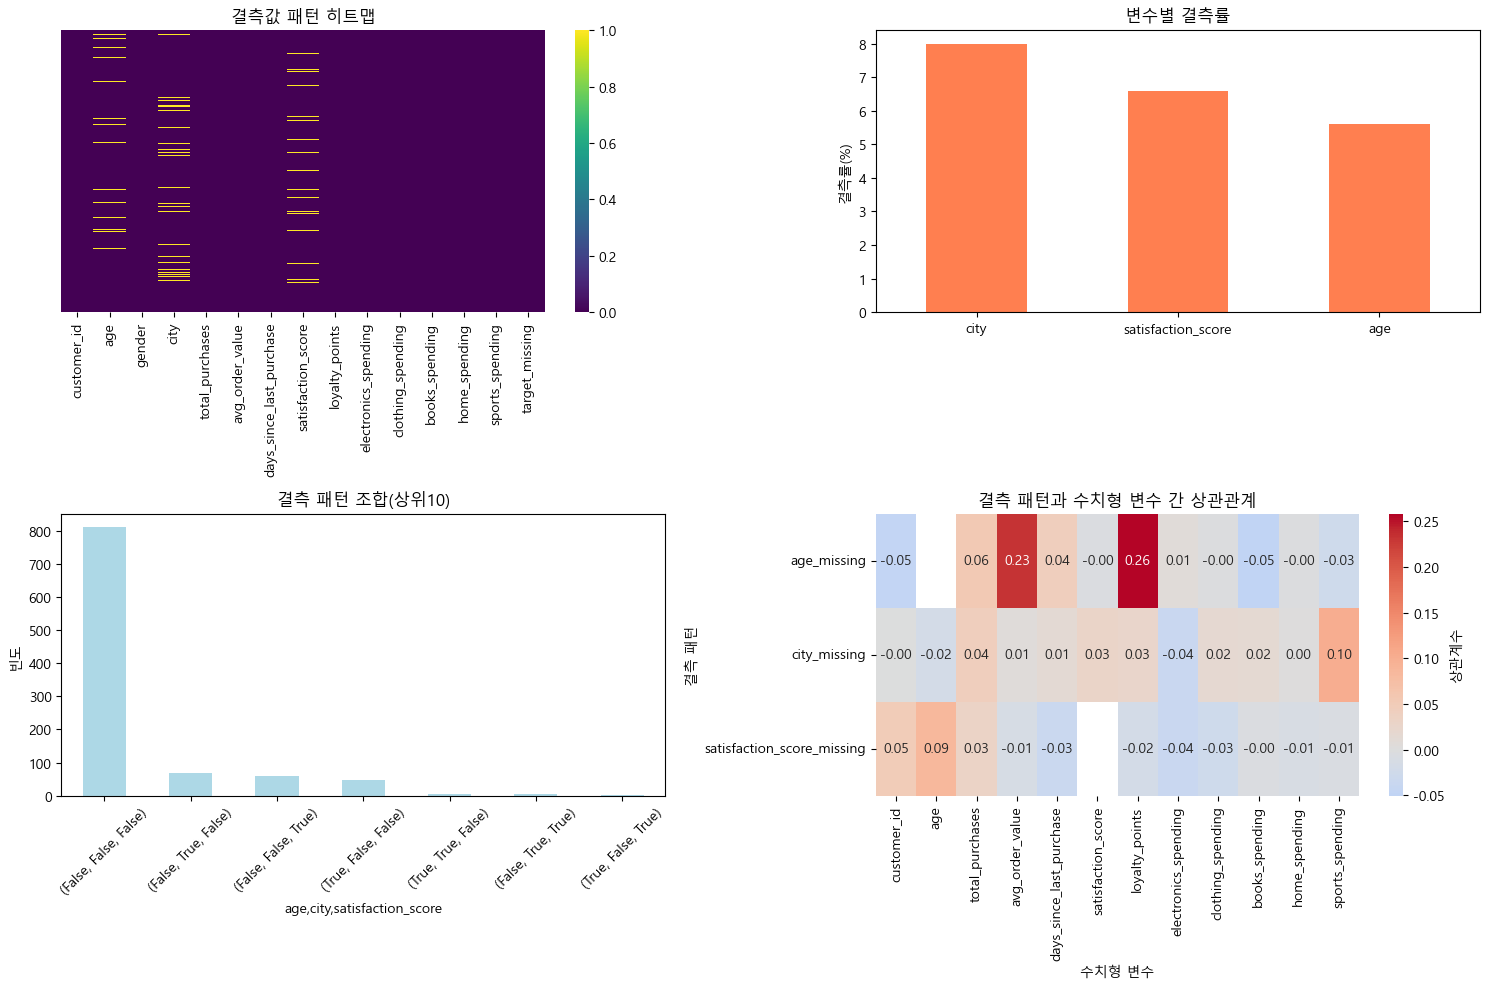

,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


def analyze_missing_patterns(df: pd.DataFrame):
    """결측값 패턴 종합 분석"""
    print('=== 결측값 패턴 분석 ===')
    missing_info = df.isna().sum()
    missing_pct = (missing_info / len(df)) * 100
    missing_summary = pd.DataFrame({
        '결측수': missing_info,
        '결측률(%)': missing_pct.round(2)
    })
    missing_summary = missing_summary[missing_summary['결측수'] > 0].sort_values('결측수', ascending=False)
    print('변수별 결측 현황')
    display(missing_summary)

    # 결측값 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

    # 1. 결측값 히트맵
    sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis', ax=a1)
    a1.set_title('결측값 패턴 히트맵')

    # 2. 변수별 결측률 바 차트
    if len(missing_summary):  # missing_summary 가 비어있지 않으면
        missing_summary['결측률(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('변수별 결측률')
        a2.set_ylabel('결측률(%)')
        a2.tick_params(axis='x', rotation=0)

    # 3. 결측값 조합 패턴
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern.columns) > 0:  # 수정: len(missing_pattern) -> len(missing_pattern.columns)
        pattern_counts = missing_pattern.value_counts().head(10)
        if len(pattern_counts) > 0:  # pattern_counts가 비어있지 않은 경우에만 플롯
            pattern_counts.plot(kind='bar', color='lightblue', ax=a3)
            a3.set_title('결측 패턴 조합(상위10)')
            a3.set_ylabel('빈도')
            a3.tick_params(axis='x', rotation=45)
        else:
            a3.text(0.5, 0.5, '결측 패턴 없음', ha='center', va='center')
            a3.axis('off')
    else:
        a3.text(0.5, 0.5, '결측값 없음', ha='center', va='center')
        a3.axis('off')


    # 4. 결측 변수별 결측 여부(0/1)와 다른 수치형 변수 간 상관관계 히트맵 시각화
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    missing_cols = df.columns[df.isna().any()].tolist()

    if len(numeric_cols) > 0 and len(missing_cols) > 0:
        # 결측값을 0/1로 변환한 DataFrame 생성
        missing_binary = df[missing_cols].isna().astype(int)
        missing_binary.columns = [f'{col}_missing' for col in missing_binary.columns]
        
        # 수치형 변수와 결측 패턴 변수 결합
        corr_data = pd.concat([df[numeric_cols], missing_binary], axis=1)
        
        # 상관계수 계산
        correlation_matrix = corr_data.corr()
        
        # 결측 패턴 변수와 수치형 변수 간의 상관관계만 추출
        missing_numeric_corr = correlation_matrix.loc[
            missing_binary.columns, 
            numeric_cols
        ]
        
        # 상관관계가 있는 경우에만 히트맵 그리기
        if missing_numeric_corr.shape[0] > 0 and missing_numeric_corr.shape[1] > 0:
            sns.heatmap(missing_numeric_corr, 
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    ax=a4,
                    cbar_kws={'label': '상관계수'})
            a4.set_title('결측 패턴과 수치형 변수 간 상관관계')
            a4.set_xlabel('수치형 변수')
            a4.set_ylabel('결측 패턴')
        else:
            a4.text(0.5, 0.5, '분석할 상관관계 없음', ha='center', va='center')
            a4.axis('off')
    else:
        a4.text(0.5, 0.5, '수치형 변수 또는\n결측값이 없음', ha='center', va='center')
        a4.axis('off')

    plt.tight_layout()
    plt.show()

    return missing_summary

# 사용 예시
analyze_missing_patterns(ecommerce)


In [42]:
from scipy.stats import chi2_contingency
# 결측 메커니즘 진단

print('=== 결측 메커니즘 진단 ===')

# MAR 패턴 Missing At Random -> (조건부) 무작위 결측
# MAR 패턴 검증 : 나이 결측과 구매액의 관계

print('나이(age) 결측 메커니즘 분석')
if ecommerce['age'].isnull().sum() > 0:
    # 구매액 분위별 나이 결측률
    df_temp = ecommerce.copy()
    df_temp['spending_quartile'] = pd.qcut(df_temp['avg_order_value'].dropna(), q=4, labels=['하위25', '하위50', '상위50', '상위25'])
    age_missing_by_spending = df_temp.groupby('spending_quartile')['age'].apply(lambda x: x.isnull().mean())
    print('\n구매액 분위별 나이 결측률')
    for key, value in age_missing_by_spending.items():
        print(f'{key}: {value:.1%}')

    con_table = pd.crosstab(df_temp['spending_quartile'], df_temp['age'].isnull())
    chi2, p_value, _, _ = chi2_contingency(con_table)

    print(f'\n카이제곱 통계량: {chi2:.3f}, p-value: {p_value:.4f}')
    if p_value < 0.05:
        print('✅ MAR 패턴 확인: 구매액에 따라 나이 결측률이 유의미하게 다름')
    else:
        print('❌ MCAR 가능성 있음: 구매액과 나이 결측이 독립적')
else:
    print('age 결측치가 없음')


# 만족도 결측 패턴 분석
print('\n만족도(satisfaction_score) 결측 메커니즘 분석')
if ecommerce['satisfaction_score'].isnull().sum() > 0:
    # 1. 연령대별 만족도 결측률 [0, 30, 50, 100] - ['청년층 ~30', '중년층 31~50', '장년층 51+']
    df_temp = ecommerce.copy()
    df_temp['age_group'] = pd.cut(df_temp['age'], bins=[0, 30, 50, 200], labels=['~30', '31~50', '50+'])
    # age_group 당 만족도의 결측률
    ss_missing_by_age = df_temp.groupby('age_group')['satisfaction_score'].apply(lambda x: x.isnull().mean())
    print('\n연령대별 만족도 결측률')
    for age_group, rate in ss_missing_by_age.items():
        print(f'  {age_group}: {rate:.2%}')

    # 2. 성별 만족도 결측률
    ss_missing_by_gender = df_temp.groupby('gender')['satisfaction_score'].apply(lambda x: x.isnull().mean())
    print('\n성별 만족도 결측률')
    for gender, rate in ss_missing_by_gender.items():
        print(f'  {gender}: {rate:.2%}')
else:
    print('만족도 결측치 없음')



=== 결측 메커니즘 진단 ===
나이(age) 결측 메커니즘 분석

구매액 분위별 나이 결측률
하위25: 0.0%
하위50: 0.0%
상위50: 0.0%
상위25: 22.4%

카이제곱 통계량: 177.966, p-value: 0.0000
✅ MAR 패턴 확인: 구매액에 따라 나이 결측률이 유의미하게 다름

만족도(satisfaction_score) 결측 메커니즘 분석

연령대별 만족도 결측률
  ~30: 4.02%
  31~50: 5.80%
  50+: 20.43%

성별 만족도 결측률
  F: 5.61%
  M: 7.91%


# 고급 결측값 대체 기법

In [43]:
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
# Impute -> 대체하다
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 숫자형 컬럼들
numeric_cols = ['age', 'total_purchases', 'avg_order_value',
       'days_since_last_purchase', 'satisfaction_score','loyalty_points']

df_numeric = ecommerce[numeric_cols]
print('원본 데이터 결측률')
for col in numeric_cols:
    missing_rate = df_numeric[col].isnull().mean()
    if missing_rate > 0:
        print(f'  {col}: {missing_rate:.2%}')

# 1. 컬럼별 결측을 모두 평균으로 대체
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df_numeric.copy()
df_mean[numeric_cols] = imputer_mean.fit_transform(df_numeric[numeric_cols])

# 2. KNN 대체 -> K-Nearest Neighbors
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = df_numeric.copy()
df_knn[numeric_cols] = imputer_knn.fit_transform(df_numeric[numeric_cols])

# 3. MICE 대체 -> Multiple Imputation by Chained Equations (결측이 있는 변수를 다른 변수들을 이용해 회귀모델 예측)
# 변수간 상관관계가 약한경우 -> 평균으로 도달하게 됨.
imputer_mice = IterativeImputer(random_state=42, max_iter=20)
df_mice = df_numeric.copy()
df_mice[numeric_cols] = imputer_mice.fit_transform(df_numeric[numeric_cols])

원본 데이터 결측률
  age: 5.60%
  satisfaction_score: 6.60%


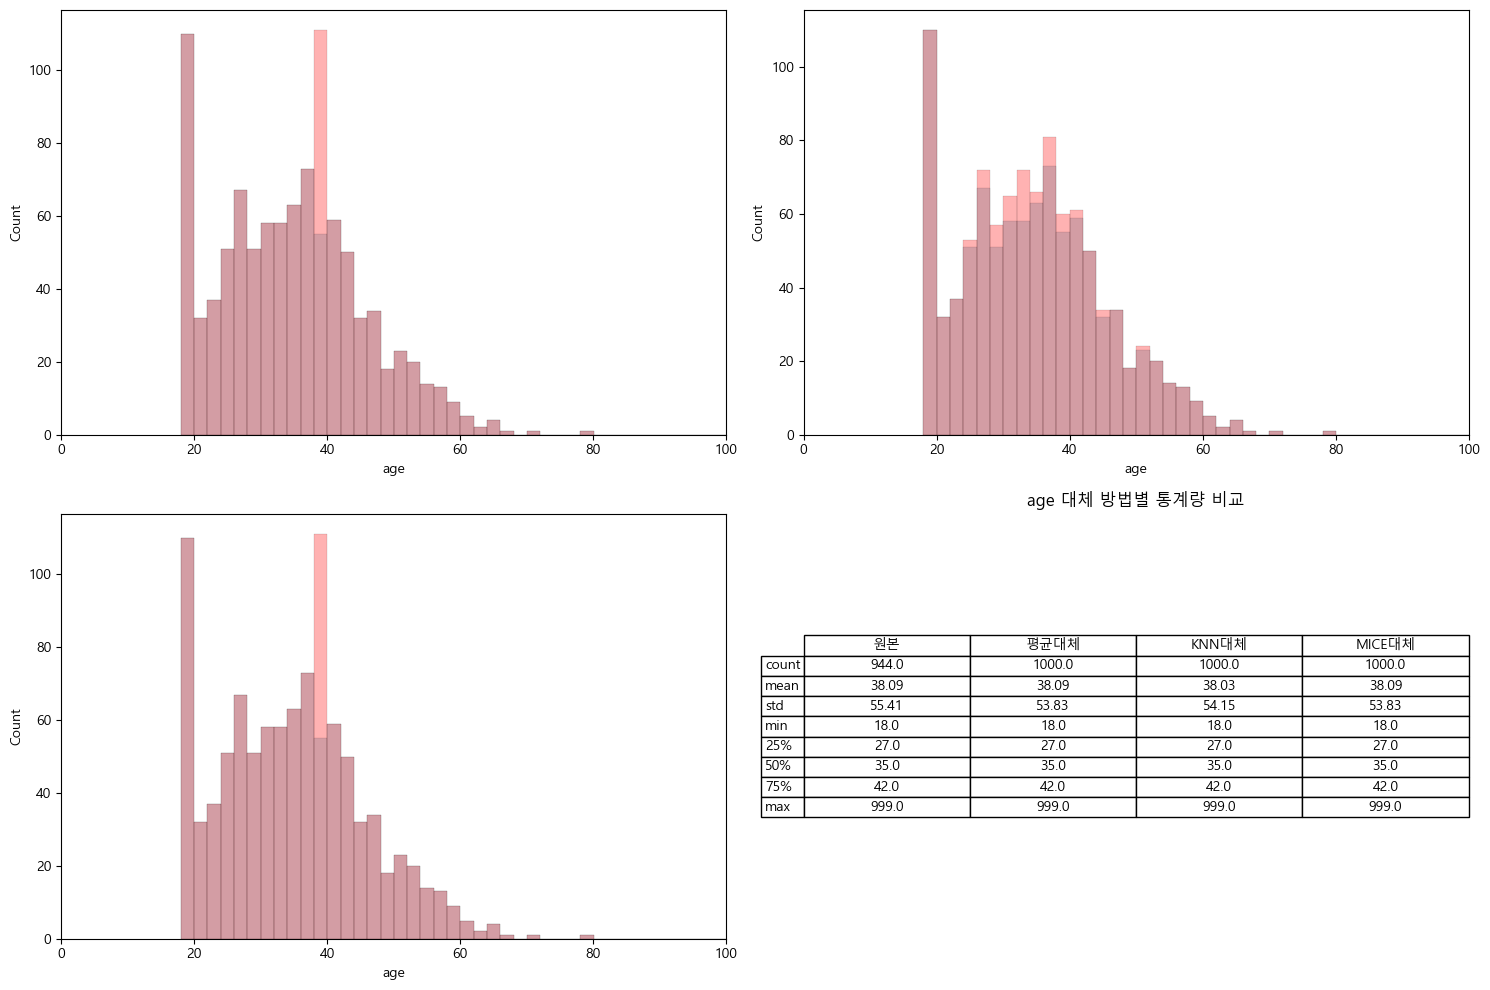

In [60]:
# 대체 결과 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# age 변수 대체 결과
variable = 'age'

if df_numeric[variable].isnull().sum() > 0:
    x_min, x_max = 0, 100
    # 원본-평균대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a1, color='lightblue', label='원본')
    sns.histplot(df_mean[variable], binwidth=2, kde=False, ax=a1, color='red', label='평균대체', alpha=0.3)
    a1.set_xlim(x_min, x_max)
    
    # 원본-KNN대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a2, color='lightblue', label='원본')
    sns.histplot(df_knn[variable], binwidth=2, kde=False, ax=a2, color='red', label='KNN', alpha=0.3)
    a2.set_xlim(x_min, x_max)

    # 원본-MICE대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a3, color='lightblue', label='원본')
    sns.histplot(df_mice[variable], binwidth=2, kde=False, ax=a3, color='red', label='MICE', alpha=0.3)
    a3.set_xlim(x_min, x_max)

    # 대체 전후 통계량 비교
    comparison_stats = pd.DataFrame({
        '원본': df_numeric[variable].describe(),
        '평균대체': df_mean[variable].describe(),
        'KNN대체': df_knn[variable].describe(),
        'MICE대체': df_mice[variable].describe(),
    }).round(2)
    
    # 텍스트로 통계 비교 표시
    a4.axis('off')
    a4.table(
        cellText=comparison_stats.values,
        rowLabels=comparison_stats.index,
        colLabels=comparison_stats.columns,
        cellLoc='center',
        loc='center'
    )
    a4.set_title(f'{variable} 대체 방법별 통계량 비교')

    plt.tight_layout()
    plt.show()

# 대체 품질 평가

In [61]:
print('=== 대체 품질 평가 ===')

original_df = df_numeric
method_names = ['평균대체', 'KNN대체', 'MICE대체']
imputed_dfs = [df_mean, df_knn, df_mice]

evaluation_results = []
for method, imputed_df in zip(method_names, imputed_dfs):

    # 1. 분포 유사성 평가
    for col in ['age', 'satisfaction_score']:
        # 결측치가 있다면,
        if original_df[col].isnull().sum():
            original_stats = original_df[col].dropna().describe()
            imputed_stats = imputed_df[col].describe()  
            # 평균 차이 (%)
            mean_diff = abs(original_stats['mean'] - imputed_stats['mean']) / original_stats['mean'] * 100
            # 표준편차 차이
            std_diff = abs(original_stats['std'] - imputed_stats['std']) / original_stats['std'] * 100
            
            evaluation_results.append({
                '방법': method,
                '변수': col,
                '평균차이(%)': mean_diff,
                '표준편차차이(%)': std_diff,
            })
    
        # 2. 상관관계 보존 평가
        # age, s.s <-> avg_order_value (상대 컬럼은 임의 선정)
        original_corr = original_df[[col, 'avg_order_value']].corr().iloc[0, 1]  # 결측치 포함되어 있음
        imputed_corr = imputed_df[[col, 'avg_order_value']].dropna().corr().iloc[0, 1]  # 결측치 대체 후
        
        # 상관관계 유지 정도
        og_corr_preservation = abs(original_corr - imputed_corr) / abs(original_corr) * 100

        evaluation_results.append({
            '방법': method,
            '변수': f'{col}-구매액 상관관계',
            '원본상관계수': original_corr,
            '대체상관계수': imputed_corr,
            '상관계수보존도(%)': 100 - og_corr_preservation,
        })

eval_df = pd.DataFrame(evaluation_results)

print('1. 분포 보존 성능')
dist_eval = eval_df[eval_df['변수'].isin(('age', 'satisfaction_score'))]
print(dist_eval[['방법', '변수', '평균차이(%)', '표준편차차이(%)']].to_string(index=False))

print('\n2. 상관관계 보존 성능')
corr_eval = eval_df[eval_df['변수'].isin(('age-구매액 상관관계', 'satisfaction_score-구매액 상관관계'))]
for _, row in corr_eval.iterrows():
    print(f'{row['방법']}: 보존도 {row['상관계수보존도(%)']:.1f}%')
    print(f'(원본: {row['원본상관계수']:.3f} → 대체후: {row['대체상관계수']:.3f})')

=== 대체 품질 평가 ===
1. 분포 보존 성능
    방법                 변수      평균차이(%)  표준편차차이(%)
  평균대체                age 1.865429e-14   2.843222
  평균대체 satisfaction_score 0.000000e+00   3.359743
 KNN대체                age 1.508068e-01   2.263812
 KNN대체 satisfaction_score 2.318097e-03   2.841924
MICE대체                age 1.597489e-03   2.843222
MICE대체 satisfaction_score 1.346629e-02   3.352197

2. 상관관계 보존 성능
평균대체: 보존도 94.9%
(원본: -0.000 → 대체후: -0.000)
평균대체: 보존도 98.9%
(원본: -0.046 → 대체후: -0.045)
KNN대체: 보존도 -828.7%
(원본: -0.000 → 대체후: -0.004)
KNN대체: 보존도 96.6%
(원본: -0.046 → 대체후: -0.047)
MICE대체: 보존도 89.5%
(원본: -0.000 → 대체후: -0.000)
MICE대체: 보존도 98.7%
(원본: -0.046 → 대체후: -0.046)


# 이상치 감지및 처리 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def outlier_detection(df: pd.DataFrame):
    pass

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 범용 이상치 탐지 함수
def outlier_detection(df: pd.DataFrame, chi_q=0.999, iso_cont=0.1, final_threshold=2):
    
    print('=== 종합 이상값 탐지 시스템 ===')
    df_copy = df.copy()
    numeric_data = df_copy.select_dtypes(include=['number'])

    # 1. 일(단)변량 IQR 이상값
    print('1. 일변량 이상값 탐지 (IQR방법)')
    univariate_outliers = pd.DataFrame(index=df_copy.index)

    for col in numeric_data.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)
        univariate_outliers[col] = outliers_mask
    
        outlier_count = outliers_mask.sum()
        if outlier_count:
            print(f'  {col}: {outlier_count}개 ({outlier_count/len(df_copy) * 100:.1f}%)')

    # 2. 마할라노비스 거리 기반 다변량 이상값 -> 데이터가 정규분포를 따를때
    print('\n2. 다변량 이상값 탐지 (마할라노비스 거리)')
    scaler = StandardScaler()
    
    # 평균0, 표준편차1 로 조정된 데이터
    scaled_df = pd.DataFrame(
        scaler.fit_transform(numeric_data),
        columns=numeric_data.columns,
        index=numeric_data.index
    )
    # 데이터 평균 벡터
    mean = scaled_df.mean().values
    # 공분산 행렬
    cov_matrix = np.cov(scaled_df, rowvar=False)
    # 공분산 행렬의 역행력
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    # 마할라노비스 거리 계산
    mahal_distance = scaled_df.apply(lambda row: distance.mahalanobis(row, mean, inv_cov_matrix), axis=1)
    
    # 이상치 기준점-임계점(threshold) 지정 (카이제곱 분포 -> 0.95, 0.99, 0.999) -> 이상치의 기준
    threshold = chi2.ppf(chi_q, len(numeric_data.columns)) ** 0.5
    mahal_outliers = mahal_distance > threshold
    print(f'  임계값: {threshold:.2f}')
    print(f'  다변량 이상값: {mahal_outliers.sum()}개 ({mahal_outliers.mean()*100:.1f}%)')
    
    
    # 3. Isolation Forest 기반 다변량 이상값 -> 데이터 이상치가 너무 복잡하게 숨어있을 때
    print('\n3. 다변량 이상값 탐지 (Isolation Forest)')
    iso_forest = IsolationForest(contamination=iso_cont, random_state=42)
    isolation_outliers = iso_forest.fit_predict(scaled_df) == -1
    isolation_scores = iso_forest.score_samples(scaled_df)
    print(f'  Isolation Forest 이상값: {isolation_outliers.sum()}개 ({isolation_outliers.mean()*100:.1f}%)')
    

    # 4. 비즈니스 규칙(특화) 이상값 - 범용X
    print('\n4. 비즈니스 규칙 기반 이상값:')
    business_outliers = (
        (df['age'] > 130) |
        (df['days_since_last_purchase'] < 0) |
        (df['avg_order_value'] > 10000000)
    )
    print(f'  비즈니스 규칙 이상값: {business_outliers.sum()}개 ({business_outliers.mean()*100:.1f}%)')

    
    # 5. 종합 판정
    outlier_summary = pd.DataFrame({
        '일변량': univariate_outliers.sum(axis=1) > 0,
        'Mahal Dist': mahal_outliers,
        'Iso Forest': isolation_outliers,
        '비즈니스': business_outliers,
    })

    outlier_summary['총이상값수'] = outlier_summary.sum(axis=1)
    # 최종 판정 기준
    final_outliers = outlier_summary['총이상값수'] >= final_threshold
    print(f'\n == 최종 이상값: {final_outliers.sum()}개 ({final_outliers.mean()*100:.1f}%)')

    return outlier_summary, final_outliers


outlier_detection(df_knn, chi_q=0.99, iso_cont=0.05, final_threshold=3)

=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR방법)
  age: 11개 (1.1%)
  avg_order_value: 70개 (7.0%)
  days_since_last_purchase: 48개 (4.8%)
  loyalty_points: 37개 (3.7%)

2. 다변량 이상값 탐지 (마할라노비스 거리)
  임계값: 4.10
  다변량 이상값: 23개 (2.3%)

3. 다변량 이상값 탐지 (Isolation Forest)
  Isolation Forest 이상값: 50개 (5.0%)

4. 비즈니스 규칙 기반 이상값:
  비즈니스 규칙 이상값: 6개 (0.6%)

 == 최종 이상값: 21개 (2.1%)


(       일변량  Mahal Dist  Iso Forest   비즈니스  총이상값수
 0    False       False       False  False      0
 1    False       False       False  False      0
 2    False       False       False  False      0
 3    False       False       False  False      0
 4    False       False       False  False      0
 ..     ...         ...         ...    ...    ...
 995   True       False        True  False      2
 996  False       False       False  False      0
 997  False       False       False  False      0
 998  False       False       False  False      0
 999  False       False       False  False      0
 
 [1000 rows x 5 columns],
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 995    False
 996    False
 997    False
 998    False
 999    False
 Name: 총이상값수, Length: 1000, dtype: bool)

=== 이상값 해석 및 처리 전략 ===
1. 이상값 vs 정상값 비교 분석:
                          정상고객_평균  이상값고객_평균  정상고객_중위수  이상값고객_중위수  차이배수
age                         35.15    182.19     35.00      38.13  5.18
total_purchases              8.91     10.20      9.00      10.00  1.14
avg_order_value            117.37    679.85     87.38     300.90  5.79
days_since_last_purchase    28.91     76.45     19.00      42.50  2.64
loyalty_points             121.58    619.25     95.50     497.50  5.09

2. 이상값 분류 및 처리 전략:
이상값 분류:
  VIP 고객 (특별 관리 대상): 10명
  데이터 오류 (수정/제거 필요): 3명
  휴면 고객 (재활성화 대상): 8명
  기타 이상값: -1명


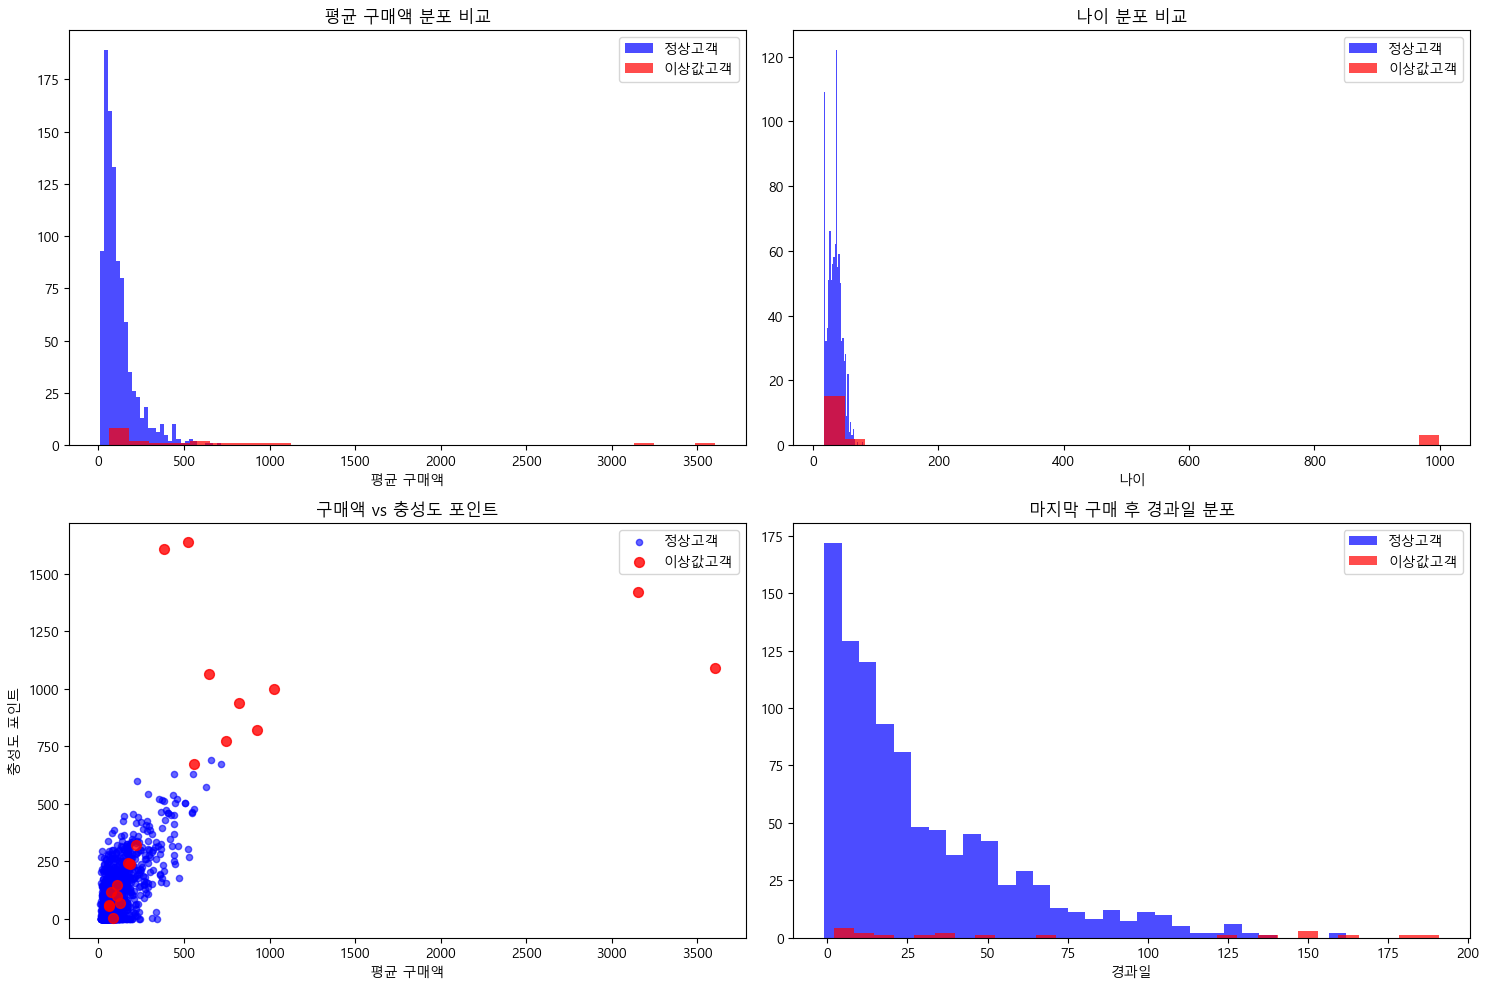

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import IterativeImputer

# 데이터 준비 (예시: df_mice가 이미 있음)
# df_mice = ... # 결측치 대체된 데이터프레임

# 이상치 탐지 함수 (반환값: outlier_summary, final_outliers)
def outlier_detection(df, chi_q=0.99, iso_cont=0.05, final_threshold=3):
    from scipy.spatial import distance
    from scipy.stats import chi2
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import IsolationForest

    numeric_data = df.select_dtypes(include=['number'])
    # 일변량 IQR
    univariate_outliers = pd.DataFrame(index=df.index)
    for col in numeric_data.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers_mask = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
        univariate_outliers[col] = outliers_mask

    # 마할라노비스 거리
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns, index=numeric_data.index)
    mean = scaled_df.mean().values
    cov_matrix = np.cov(scaled_df, rowvar=False)
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    mahal_distance = scaled_df.apply(lambda row: distance.mahalanobis(row, mean, inv_cov_matrix), axis=1)
    threshold = chi2.ppf(chi_q, len(numeric_data.columns)) ** 0.5
    mahal_outliers = mahal_distance > threshold

    # Isolation Forest
    iso_forest = IsolationForest(contamination=iso_cont, random_state=42)
    isolation_outliers = iso_forest.fit_predict(scaled_df) == -1

    # 비즈니스 규칙
    business_outliers = (
        (df['age'] > 130) |
        (df['days_since_last_purchase'] < 0) |
        (df['avg_order_value'] > 10000000)
    )

    # 종합 판정
    outlier_summary = pd.DataFrame({
        '일변량': univariate_outliers.sum(axis=1) > 0,
        'Mahal Dist': mahal_outliers,
        'Iso Forest': isolation_outliers,
        '비즈니스': business_outliers,
    })
    outlier_summary['총이상값수'] = outlier_summary.sum(axis=1)
    final_outliers = outlier_summary['총이상값수'] >= final_threshold

    return outlier_summary, final_outliers

# 이상값 해석 및 처리 전략 함수
def outlier_interpretation_strategy(df, outliers_mask):
    print("=== 이상값 해석 및 처리 전략 ===")
    normal_customers = df[~outliers_mask]
    outlier_customers = df[outliers_mask]
    if len(outlier_customers) == 0:
        print("이상값이 없습니다.")
        return
    print("1. 이상값 vs 정상값 비교 분석:")
    comparison_vars = ['age', 'total_purchases', 'avg_order_value', 'days_since_last_purchase', 'loyalty_points']
    comparison_stats = pd.DataFrame({
        '정상고객_평균': normal_customers[comparison_vars].mean(),
        '이상값고객_평균': outlier_customers[comparison_vars].mean(),
        '정상고객_중위수': normal_customers[comparison_vars].median(),
        '이상값고객_중위수': outlier_customers[comparison_vars].median()
    }).round(2)
    comparison_stats['차이배수'] = (comparison_stats['이상값고객_평균'] / comparison_stats['정상고객_평균']).round(2)
    print(comparison_stats)
    print(f"\n2. 이상값 분류 및 처리 전략:")
    vip_mask = (outlier_customers['avg_order_value'] > normal_customers['avg_order_value'].quantile(0.95)) & \
               (outlier_customers['loyalty_points'] > normal_customers['loyalty_points'].quantile(0.95))
    vip_count = vip_mask.sum()
    error_mask = (outlier_customers['age'] > 100) | (outlier_customers['days_since_last_purchase'] < 0)
    error_count = error_mask.sum()
    dormant_mask = outlier_customers['days_since_last_purchase'] > normal_customers['days_since_last_purchase'].quantile(0.95)
    dormant_count = dormant_mask.sum()
    print(f"이상값 분류:")
    print(f"  VIP 고객 (특별 관리 대상): {vip_count}명")
    print(f"  데이터 오류 (수정/제거 필요): {error_count}명") 
    print(f"  휴면 고객 (재활성화 대상): {dormant_count}명")
    print(f"  기타 이상값: {len(outlier_customers) - vip_count - error_count - dormant_count}명")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
    a1.hist(normal_customers['avg_order_value'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a1.hist(outlier_customers['avg_order_value'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a1.set_title('평균 구매액 분포 비교')
    a1.set_xlabel('평균 구매액')
    a1.legend()
    a2.hist(normal_customers['age'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a2.hist(outlier_customers['age'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a2.set_title('나이 분포 비교')
    a2.set_xlabel('나이')
    a2.legend()
    a3.scatter(normal_customers['avg_order_value'], normal_customers['loyalty_points'], 
                     alpha=0.6, label='정상고객', color='blue', s=20)
    a3.scatter(outlier_customers['avg_order_value'], outlier_customers['loyalty_points'], 
                     alpha=0.8, label='이상값고객', color='red', s=50)
    a3.set_xlabel('평균 구매액')
    a3.set_ylabel('충성도 포인트')
    a3.set_title('구매액 vs 충성도 포인트')
    a3.legend()
    a4.hist(normal_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='정상고객', color='blue')
    a4.hist(outlier_customers['days_since_last_purchase'], bins=30, alpha=0.7, label='이상값고객', color='red')
    a4.set_title('마지막 구매 후 경과일 분포')
    a4.set_xlabel('경과일')
    a4.legend()
    plt.tight_layout()
    plt.show()
# 실제 실행 코드
outlier_summary, final_outliers = outlier_detection(df_mice, chi_q=0.99, iso_cont=0.05, final_threshold=3)
outlier_summary, final_outliers = outlier_detection(df_mice, chi_q=0.99, iso_cont=0.05, final_threshold=3)
outlier_interpretation_strategy(df_mice, final_outliers)
